# Otimização em série

Aqui farei a otmização do controlador individual por junta pois a otimização em lote se mostrou ineficiente para mecanismos com uma quantidade elevada de graus de liberdade.

In [1]:
include("../comum.jl")
include("../modelos.jl")
using Evolutionary, Plots;
pyplot();
#plotlyjs();

In [2]:
Ts = 0.08     #período de leitura
tend = 2.0    #tempo final
t0 = 0.0      # tempo inicial
popul  = 20   # população
iterac = 5   #iterações
α = 10.       #parâmetro para o erro
β = 0.01      #parâmetro para o jerk
γ = 0.1       #parâmetro para o torque
per = 1/2     #inicio da leitura do vetor a parti de per do comprimento total
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]) #referências
kp_end = AbstractFloat[]
kv_end = AbstractFloat[];

## Otimização junta 7

In [3]:
function gerador7(n)
    n = n/2
    kp = push!(zeros(n-1),rand()*rand([10.,100.,1000.,10000]))
    kv = push!(zeros(n-1),rand()*rand([10.,100.,1000.]))
    vcat(kp,kv)
end;

In [4]:
function generateCusto(junta::Integer)
    out = function custo(gain::Vector{Float64})
        kp = SMatrix{7,7}(diagm(gain[1:7]))
        kv = SMatrix{7,7}(diagm(gain[8:end]))
        x, v, t, a, ta, j, tj, τ, t_tau = kukaRobot(kp, kv, Ts, t0, tend, xr)
        sizeVector = length(x[1])

        erro_sum = 0.
        erro = -(x[junta]-xr[junta])
        erro_sum += sum(abs.(erro[floor(Integer,sizeVector*per):end])) 

        jerk_sum = 0.
        jerk_sum += sum(abs.(j[junta]))
        
        torque_sum = 0.
        torque_sum += sum(abs.(τ[junta]))
        
        erro_sum = erro_sum * α
        jerk_sum = jerk_sum * β 
        torque_sum = torque_sum * γ

        out =  erro_sum + jerk_sum + torque_sum
        out
    end
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(7), N; initPopulation = gerador7, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 0.0%

 Progress:|███████████████████████████████████████████████████| 20.0%

 Progress:|███████████████████████████████████████████████████| 40.0%

 Progress:|███████████████████████████████████████████████████| 60.0%

In [12]:
push!(kp_end, result[7])
push!(kv_end, result[14])
Markdown.parse("---|junta 7\n---|---\n**KP**|$(round(result[7],2))\n**KV**|$(round(result[14],2))")

|     –- | junta 7 |
| ------:| -------:|
| **KP** | 6005.37 |
| **KV** |     2.1 |


## Otimização junta 6

In [13]:
function gerador6(n)
    n = n/2
    kp = push!(zeros(n-2),rand()*rand([10.,100.,1000.,10000]))
    push!(kp,result[7])
    kv = push!(zeros(n-2),rand()*rand([10.,100.,1000.]))
    push!(kv,result[14])
    vcat(kp,kv)
end;

In [33]:
N = 14
result, fitness, cnt = ga(generateCusto(6), N; initPopulation = gerador6, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

 Progress:|███████████████████████████████████████████████████| 100.0%

([0.0, 0.0, 0.0, 0.0, 0.0, 6.56544, 6005.37, 0.0, 0.0, 0.0, 0.0, 0.0, 38.1614, 2.10395], 143.62129803528762, 2, 0.0, Dict{Symbol,Any}())

In [ ]:
push!(kp_end, result[6])
push!(kv_end, result[13])
Markdown.parse("---|junta 6\n---|---\n**KP**|$(round(result[6],2))\n**KV**|$(round(result[13],2))")

## Otimização junta 5

In [ ]:
function gerador5(n)
    n = n/2
    kp = push!(zeros(n-3),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[6:7])
    kv = push!(zeros(n-3),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[13:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(5), N; initPopulation = gerador5, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

## Otimização junta 4

In [ ]:
function gerador4(n)
    n = n/2
    kp = push!(zeros(n-4),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[5:7])
    kv = push!(zeros(n-4),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[12:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(4), N; initPopulation = gerador4, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

## Otimização junta 3

In [ ]:
function gerador3(n)
    n = n/2
    kp = push!(zeros(n-5),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[4:7])
    kv = push!(zeros(n-5),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[11:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(3), N; initPopulation = gerador3, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

## Otimização junta 2

In [ ]:
function gerador2(n)
    n = n/2
    kp = push!(zeros(n-6),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[3:7])
    kv = push!(zeros(n-6),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[10:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(2), N; initPopulation = gerador2, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

## Otimização junta 1

In [ ]:
function gerador1(n)
    n = n/2
    kp = push!(zeros(n-7),rand()*rand([10.,100.,1000.,10000]))
    kp = vcat(kp,result[2:7])
    kv = push!(zeros(n-7),rand()*rand([10.,100.,1000.]))
    kv = vcat(kv,result[9:14])
    vcat(kp,kv)
end;

In [ ]:
N = 14
result, fitness, cnt = ga(generateCusto(1), N; initPopulation = gerador1, populationSize = popul, ɛ = 0.25, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac, showBar = true)

## Resultado Final

In [34]:
t_end_new = 2.
kp = SMatrix{7,7}(diagm(result[1:7]))
kv = SMatrix{7,7}(diagm(result[8:end]))

x, v, t, a, ta, j, tj, τ, t_tau = kukaRobot(kp, kv, Ts, t0, t_end_new, xr);

In [35]:
erro = []
for i=1:7
    push!(erro, abs.(x[i] - xr[i]))
end 
tabela(erro, "Erro")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| ---------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Erro máximo** |     4.3 |    8.16 |    4.26 |     8.0 |   11.94 |     1.2 |     0.8 |
| **Erro mínimo** |    0.83 |    0.07 |    0.37 |    0.08 |     0.5 |    0.87 |     0.0 |
|  **Erro total** |   44.54 |   76.44 |   33.32 |    99.8 |  121.21 |   26.53 |     0.8 |


In [36]:
function plotx(i)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    p6 = plot(t,x[6], label = "simulação 6")
    p6= plot!([xr[6]],seriestype= :hline, label = "referência 6")
    p7 = plot(t,x[7], label = "simulação 7")
    p7= plot!([xr[7]],seriestype= :hline, label = "referência 7")
    plot(p1,p2,p3,p4,p5,p6,p7, layout =(7,1))
end

plotx (generic function with 2 methods)

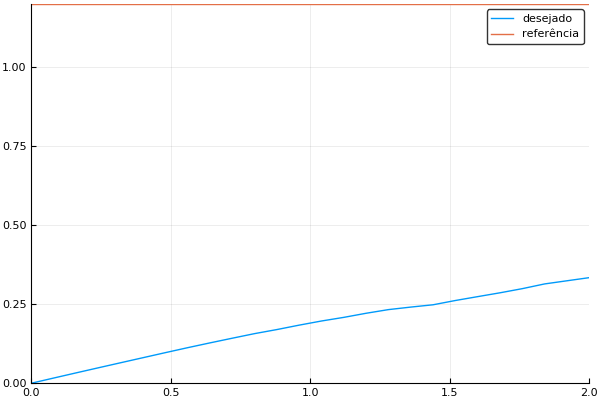

In [37]:
plotx(6)

In [38]:
tabela(j,"Jerk")

|              –- |  junta 1 | junta 2 |  junta 3 |  junta 4 |  junta 5 | junta 6 | junta 7 |
| ---------------:| --------:| -------:| --------:| --------:| --------:| -------:| -------:|
| **Jerk máximo** | 11649.23 | 3527.36 | 27311.63 |  9663.38 | 20444.07 |  365.85 |   14.22 |
| **Jerk mínimo** |     0.22 |    1.29 |     0.67 |     0.46 |     4.05 |    0.52 |    0.01 |
|  **Jerk total** | 39065.46 | 18255.7 | 80560.44 | 34725.37 | 61577.58 | 1043.52 |   32.57 |


In [39]:
tabela(τ,"Torque")

|                –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 | junta 6 | junta 7 |
| -----------------:| -------:| -------:| -------:| -------:| -------:| -------:| -------:|
| **Torque máximo** |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |     2.8 |    0.15 |
| **Torque mínimo** |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |    0.02 |     0.0 |
|  **Torque total** |     0.0 |     0.0 |     0.0 |     0.0 |     0.0 |   14.34 |    0.65 |
